Я правильно понимаю, что в `Tkinter` нельзя работать с таблицами и графиками? 

Например, вывести в окне таблицу `Excel` или график `matplotlib`. Для этих целей лучше использовать `wxPython`?

---

Вы подняли очень важный вопрос, и я рад разъяснить, что **Tkinter** вполне способен работать с таблицами и графиками, но есть нюансы, которые могут повлиять на выбор инструмента. Давайте разберем это подробно, а также сравним возможности Tkinter и wxPython для этих задач.

---

### 1. Работа с таблицами в Tkinter
Tkinter **не имеет встроенного виджета для работы с таблицами** (в отличие от, например, PyQt или wxPython, где есть готовые решения). Однако вы можете реализовать таблицы либо с помощью сторонних библиотек, либо используя встроенные виджеты, такие как `Treeview` (часть модуля `ttk`), который позволяет создавать таблицы с колонками и строками.

- #### Пример вывода таблицы в Tkinter с использованием `ttk.Treeview`:

In [1]:
import tkinter as tk
from tkinter import ttk

def create_table_window():
    root = tk.Tk()
    root.title("Таблица в Tkinter")
    root.geometry("600x400")

    # Создаем Treeview для отображения таблицы
    tree = ttk.Treeview(root, columns=("Name", "Age", "City"), show="headings")
    tree.heading("Name", text="Имя")
    tree.heading("Age", text="Возраст")
    tree.heading("City", text="Город")
    tree.pack(fill=tk.BOTH, expand=True)

    # Добавляем данные в таблицу
    data = [
        ("Алексей", 25, "Москва"),
        ("Елена", 30, "Санкт-Петербург"),
        ("Иван", 22, "Новосибирск"),
    ]
    for row in data:
        tree.insert("", tk.END, values=row)

    root.mainloop()

if __name__ == "__main__":
    create_table_window()

#### Импорт таблицы из Excel в Tkinter:
Для работы с таблицами Excel в Tkinter можно использовать библиотеку `pandas` для чтения данных из файла Excel, а затем отобразить их в `ttk.Treeview`. 

- Вот пример:

In [11]:
import tkinter as tk
from tkinter import ttk
import pandas as pd

file = "D:/РАБОТА/2025-2019_ЖУРНАЛ УЧЁТА.xlsm"

def create_table_window():
    root = tk.Tk()
    root.title("Таблица из Excel в Tkinter")
    root.geometry("600x400")

    # Читаем данные из Excel
    # df = pd.read_excel("example.xlsx")  # Укажите путь к вашему файлу Excel
    # считываем файл Excel и создаем датафрейм
    df = pd.read_excel(
        file,
        sheet_name="2025",
        usecols=[
            "Месяц регистрации",
            "Период выявления дефекта (отказа)",
            "Наименование изделия",
            "Обозначение изделия",
            "Дата изготовления изделия",
            "Транспортное средство (установка)",
            "Пробег, наработка",
            "Количество предъявленных изделий",
            "Виновник дефекта - БЗА",
            "Виновник дефекта - потребитель",
            "Изделие соответствует  ТУ",
            "Виновник не установлен",
            "Причины возникновения дефектов",
            "Пояснения к причинам возникновения дефектов",
            "Поставщик дефектного комплектующего",
        ],
        header=1,
    )

    # Создаем Treeview для отображения таблицы
    tree = ttk.Treeview(root, columns=list(df.columns), show="headings")
    for col in df.columns:
        tree.heading(col, text=col)
    tree.pack(fill=tk.BOTH, expand=True)

    # Добавляем данные в таблицу
    for index, row in df.iterrows():
        tree.insert("", tk.END, values=list(row))

    root.mainloop()

if __name__ == "__main__":
    create_table_window()

d:\MyRepositories\JobProjects\Общее_приложение\allapp_venv\lib\site-packages\openpyxl\worksheet\_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


**Ограничения:**
- `ttk.Treeview` не предоставляет функционал редактирования ячеек "из коробки". Для этого нужно писать дополнительные обработчики событий.
- Внешний вид таблицы может быть не таким современным, как в других библиотеках.

#### Альтернатива для таблиц в Tkinter:
- Если вам нужен более функциональный виджет для таблиц (например, с возможностью редактирования ячеек), можно использовать стороннюю библиотеку, такую как `tkintertable` (устанавливается через `pip install tkintertable`). Однако она менее популярна и может быть сложнее в освоении.

---

### 2. Работа с графиками в Tkinter

Tkinter **отлично интегрируется с библиотекой `matplotlib`**, что позволяет встраивать графики в окна приложения. 

Для этого используется `FigureCanvasTkAgg` из `matplotlib.backends.backend_tkagg`.

- #### Пример вывода графика matplotlib в Tkinter:

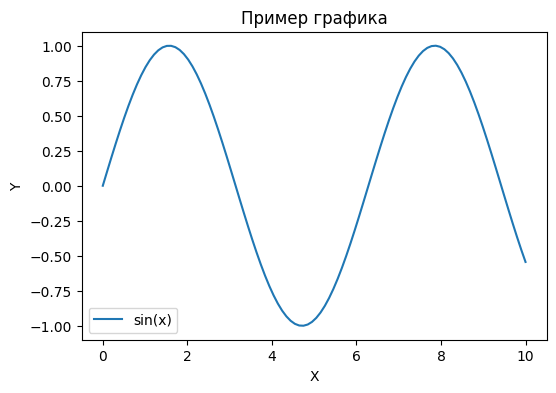

In [3]:
import tkinter as tk
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import matplotlib.pyplot as plt
import numpy as np

def create_graph_window():
    root = tk.Tk()
    root.title("График в Tkinter")
    root.geometry("600x400")

    # Создаем данные для графика
    x = np.linspace(0, 10, 100)
    y = np.sin(x)

    # Создаем фигуру matplotlib
    fig, ax = plt.subplots()
    ax.plot(x, y, label="sin(x)")
    ax.set_title("Пример графика")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.legend()

    # Встраиваем график в окно Tkinter
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    root.mainloop()

if __name__ == "__main__":
    create_graph_window()

**Преимущества:**
- Полная интеграция с `matplotlib`, что позволяет использовать все возможности этой библиотеки (графики, диаграммы, 3D-визуализация и т.д.).
- Возможность обновлять графики динамически (например, при изменении данных).

**Ограничения:**
- Интерфейс может быть менее отзывчивым при работе с большими объемами данных или сложными графиками.
- Внешний вид может быть не таким нативным, как в других библиотеках.

---

### 3. Работа с таблицами в wxPython

wxPython предоставляет встроенный виджет для работы с таблицами — `wx.grid.Grid`. 

Этот виджет гораздо более функционален, чем `ttk.Treeview` в Tkinter, и позволяет редактировать ячейки, изменять размеры столбцов и строк, а также настраивать внешний вид.

- #### Пример вывода таблицы в wxPython:

In [2]:
import wx
import wx.grid

class TableWindow(wx.Frame):
    def __init__(self, parent, title):
        super(TableWindow, self).__init__(parent, title=title, size=(600, 400))

        # Создаем панель
        panel = wx.Panel(self)
        vbox = wx.BoxSizer(wx.VERTICAL)

        # Создаем таблицу
        grid = wx.grid.Grid(panel)
        grid.CreateGrid(10, 3)  # 10 строк, 3 столбца
        grid.SetColLabelValue(0, "Имя")
        grid.SetColLabelValue(1, "Возраст")
        grid.SetColLabelValue(2, "Город")

        # Заполняем таблицу данными
        data = [
            ("Алексей", "25", "Москва"),
            ("Елена", "30", "Санкт-Петербург"),
            ("Иван", "22", "Новосибирск"),
        ]
        for i, row in enumerate(data):
            for j, value in enumerate(row):
                grid.SetCellValue(i, j, value)

        vbox.Add(grid, proportion=1, flag=wx.EXPAND | wx.ALL, border=10)
        panel.SetSizer(vbox)

        self.Centre()
        self.Show(True)


def main():
    app = wx.App()
    TableWindow(None, "Таблица в wxPython")
    app.MainLoop()


if __name__ == "__main__":
    main()

#### Импорт таблицы из Excel в wxPython:
Аналогично Tkinter, можно использовать `pandas` для чтения данных из Excel и отобразить их в `wx.grid.Grid`.

Примеры работы с файлами `Excel` в `wxPython` смотри в конспектах `"Excel в wxPython (claude-3-5)"` и `"Excel в wxPython (grok-3)"`.

**Преимущества:**
- Встроенный функционал редактирования ячеек.
- Более современный и нативный внешний вид.
- Легкость настройки (например, изменение размеров столбцов, сортировка и т.д.).

### 4. Работа с графиками в wxPython

wxPython также поддерживает интеграцию с `matplotlib`, но делает это через `wxAgg` бэкенд. 

Принцип работы схож с Tkinter, но интерфейс может быть более отзывчивым и нативным.

- #### Пример вывода графика matplotlib в wxPython:

In [1]:
import wx
import matplotlib
matplotlib.use('WXAgg')
from matplotlib.backends.backend_wxagg import FigureCanvasWxAgg as FigureCanvas
from matplotlib.figure import Figure
import numpy as np

class GraphWindow(wx.Frame):
    def __init__(self, parent, title):
        super(GraphWindow, self).__init__(parent, title=title, size=(600, 400))

        # Создаем панель
        panel = wx.Panel(self)
        vbox = wx.BoxSizer(wx.VERTICAL)

        # Создаем фигуру matplotlib
        fig = Figure()
        ax = fig.add_subplot(111)
        x = np.linspace(0, 10, 100)
        y = np.sin(x)
        ax.plot(x, y, label="sin(x)")
        ax.set_title("Пример графика")
        ax.set_xlabel("X")
        ax.set_ylabel("Y")
        ax.legend()

        # Встраиваем график в окно wxPython
        canvas = FigureCanvas(panel, -1, fig)
        vbox.Add(canvas, proportion=1, flag=wx.EXPAND | wx.ALL, border=10)
        panel.SetSizer(vbox)

        self.Centre()
        self.Show(True)


def main():
    app = wx.App()
    GraphWindow(None, "График в wxPython")
    app.MainLoop()


if __name__ == "__main__":
    main()

**Преимущества:**
- Более нативный и отзывчивый интерфейс по сравнению с Tkinter.
- Легкость интеграции с другими виджетами wxPython.

---

### 5. Сравнение Tkinter и wxPython для таблиц и графиков

| **Критерий**            | **Tkinter**                              | **wxPython**                             |
|--------------------------|------------------------------------------|------------------------------------------|
| **Таблицы**             | Требуется `ttk.Treeview` или сторонние библиотеки; ограниченный функционал редактирования. | Встроенный `wx.grid.Grid` с поддержкой редактирования и настройки. |
| **Графики**             | Интеграция с `matplotlib` через `FigureCanvasTkAgg`. | Интеграция с `matplotlib` через `FigureCanvasWxAgg`, более нативный вид. |
| **Внешний вид**         | Может выглядеть устаревшим, но можно улучшить с помощью `ttk`. | Более современный и нативный внешний вид. |
| **Простота освоения**   | Проще для новичков, встроен в Python.    | Требует установки и изучения, сложнее Tkinter. |
| **Производительность**  | Может быть медленнее при сложных интерфейсах. | Более отзывчивый интерфейс. |


### 6. Рекомендации
- **Если вы хотите работать с таблицами и графиками и при этом сохранить простоту разработки**, Tkinter подойдет, особенно если вы уже знакомы с ним. Для таблиц используйте `ttk.Treeview`, а для графиков — `matplotlib`.
- **Если вам нужен более функциональный и современный интерфейс**, особенно для работы с таблицами (например, с возможностью редактирования), wxPython будет лучшим выбором. Он также хорошо интегрируется с `matplotlib` для графиков.
- **Если вы планируете разрабатывать сложные приложения с большим количеством виджетов и современным дизайном**, рассмотрите PyQt или PySide, которые предлагают еще больше возможностей, чем wxPython.


### 7. Итог
Вы **можете** работать с таблицами и графиками в Tkinter, но для более сложных задач (особенно с таблицами) wxPython будет удобнее и функциональнее. Выбор зависит от ваших целей, уровня опыта и требований к внешнему виду приложения.

---